# Applied Neural Network
**CS 4499/5599**

# MidProject: Cats and Dogs <br/>
Instructor: Dr.Leslie Kerby
<Br>
T/A: Samantha Ross<Br>
Sushan Manandhar<Br>
Date: March 31 2022<Br>

**Citation: Most of the code has been retrived from the file provided on Moodle and Google Colab <Br>
keras tuner reference link : https://www.tensorflow.org/tutorials/images/cnn

Use the Cats and Dogs dataset in Kaggle from Homework 3. Download the dataset and perform necessary data wrangling or preprocessing, just like you did in HW 3 (ie in Parts 1-3).

In [ ]:
#install kaggle
!pip install -q kaggle
from google.colab import files
files.upload()
#kaggle.json file attached with this file needs to be chosem and uploaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sushanmanandhar","key":"b0616eacacb5528c1ae8ef27018db8b3"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle
#copy the kaggle.jason file into the folder we havve created
! cp kaggle.json ~/.kaggle/
 #permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json
# to list all datasets in kaggle
! kaggle datasets list
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -f train.zip


ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                        2022 Ukraine Russia War                              2KB  2022-03-31 09:44:51           3724        237  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021           Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           3493        102  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease    Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           6264        134  1.0              
datasets/vivek468/superstore-dataset-final                  

In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

Five sample image of random dogs and cats 


<Figure size 2000x1000 with 0 Axes>

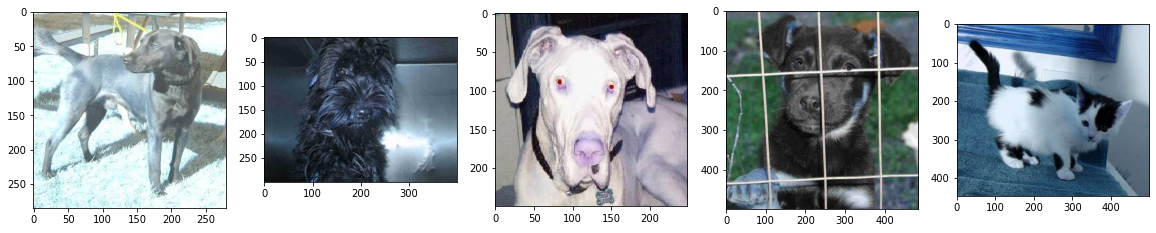

In [ ]:
# code from Homework3 which was prior retrieved from the same file provided by Dr. Kerby

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# set the random np seed to 15
np.random.seed(15)
# set tensorflow seed to 15
tf.random.set_seed(15)

# filenames is a list of all the files we put in the training directory
filenames = os.listdir("train/")

categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

# Create a dataframe that holds the name (y) of the file and

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

import cv2

print("Five sample image of random dogs and cats ")

dogAndCatsSampleimg = []
for i in range(5):
    img = cv2.imread('train/' + df['filename'][i], cv2.IMREAD_COLOR)

    dogAndCatsSampleimg.append(img)
plt.figure(figsize=(20, 10), dpi=100)
# this prints the samples image of the five random dogs and cats 
fig, imgArray = plt.subplots(1,5, figsize=(20,15))
imgArray[0].imshow(dogAndCatsSampleimg[0])
imgArray[1].imshow(dogAndCatsSampleimg[1])
imgArray[2].imshow(dogAndCatsSampleimg[2])
imgArray[3].imshow(dogAndCatsSampleimg[3])
imgArray[4].imshow(dogAndCatsSampleimg[4])

In [ ]:

#Here the files are resized in 60x60 pixels, 3 channels (RGB) format
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (60,60))  # This tuple represents the final image size desired
 # 25000 images, 60x60 pixels, 3 channels (RGB)   
X = np.ndarray((25000,60,60,3))  
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/'+image_file)



In [ ]:
# Here the Train test size is splitted each in 5k
from sklearn.model_selection import train_test_split

Y = categories
Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=5000)

In [ ]:
X[0].shape


(60, 60, 3)

**Part 1** <br/>
Create a CNN dog/cat classifier with the following architecture: <br/>


In [ ]:
# 2D convolution layer
# https://keras.io/api/layers/convolution_layers/convolution2d/

from keras.models import Sequential
# Conv2D: 64 filters, 7x7 kernel 
model = Sequential([
      keras.layers.Conv2D(filters=64,kernel_size=[7,7],strides=[1,1],padding="same",
      activation="relu", input_shape=[60,60,3]),
      #MaxPooling2D: 2x2 pool
      keras.layers.MaxPool2D((2,2)),

      # Conv2D: 128 filters, 3x3 kernel
      keras.layers.Conv2D(filters=128, kernel_size=[3,3],strides=1,padding="same",activation="relu"),
     
      # Conv2D: 128 filters, 3x3 kernel
      keras.layers.Conv2D(filters=128,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),
      # MaxPooling2D: 2x2 pool
      keras.layers.MaxPool2D((2,2)),

      # Conv2D: 256 filters, 3x3 kernel
      keras.layers.Conv2D(filters=256, kernel_size=[3,3],strides=1,padding="same",activation="relu"),

      # Conv2D: 256 filters, 3x3 kernel
      keras.layers.Conv2D(filters=256,kernel_size=[3,3],strides=1,padding="same",activation="relu"),
      # MaxPooling2D: 2x2 pool
      keras.layers.MaxPool2D((2,2)),
      # Flatten
      keras.layers.Flatten(),
      # Dense: 128 neurons
      keras.layers.Dense(128, input_shape=X_train.shape[1:], activation="relu"),
      # Dropout(15%)
      keras.layers.Dropout(0.15),
      # Dense: 64 neurons
      keras.layers.Dense(64, input_shape=X_train.shape[1:], activation="relu"),
      # Dropout(15%)
      keras.layers.Dropout(0.15),
      keras.layers.Dense(2, activation="softmax")

])



In [ ]:
# compiling the above CNN model with the Nadam optimizer 
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Utilizing the Early Stopping with the patience (5)
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/5
469/469 [==============================] - 476s 1s/step - loss: 0.9949 - accuracy: 0.5195 - val_loss: 0.6915 - val_accuracy: 0.5042
Epoch 2/5
469/469 [==============================] - 463s 988ms/step - loss: 0.6932 - accuracy: 0.5699 - val_loss: 0.6719 - val_accuracy: 0.5868
Epoch 3/5
469/469 [==============================] - 461s 982ms/step - loss: 0.6760 - accuracy: 0.5990 - val_loss: 0.6328 - val_accuracy: 0.6412
Epoch 4/5
469/469 [==============================] - 461s 982ms/step - loss: 0.6244 - accuracy: 0.6578 - val_loss: 0.6208 - val_accuracy: 0.6736
Epoch 5/5
469/469 [==============================] - 456s 973ms/step - loss: 0.5721 - accuracy: 0.7061 - val_loss: 0.5574 - val_accuracy: 0.7116


In [ ]:
# Model Evaluation
model.evaluate(X_test, y_test)


157/157 [==============================] - 38s 239ms/step - loss: 0.5446 - accuracy: 0.7208


[0.5445763468742371, 0.72079998254776]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


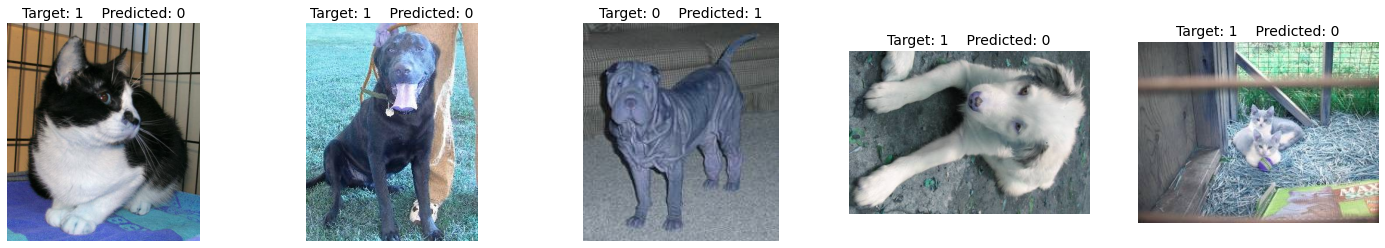

In [ ]:
# prediction
predictions = np.argmax(model.predict(X_test), axis=-1)
# missclassified index array with index 20000
misclassifiedIndexes = []
index = 20000
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1
# plot figure with the dimension 25*4 and subplot dimension 1*5*1
plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
img = cv2.imread('train/' + df['filename'][misclassifiedIndexes[0]], cv2.IMREAD_COLOR)
plt.imshow(img) 

# temporary value holder in between 0 and 1 i.e. dog and cats respectively
temp = 1
for index in misclassifiedIndexes:
  plt.subplot(1,5,temp)
  img = cv2.imread('train/' + df['filename'][index], cv2.IMREAD_COLOR)
  plt.axis('off')
  plt.title(f'Target: {categories[y_test[index - 20000]]}    Predicted: {categories[predictions[index - 20000]]}', fontsize=14)
  plt.imshow(img)
  temp += 1
  if temp > 5:
    break

In [ ]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
# Data pre-processing and data augmentation
# Link = https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
datagen = ImageDataGenerator(rotation_range=40, horizontal_flip=True)
# Here the architechture is same as above (as mentioned on part1 question)
model = Sequential([
      keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],padding="same", activation="relu", input_shape=[60,60,3]),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=128,kernel_size=[3,3], strides=1,padding="same",activation="relu"),

      keras.layers.Conv2D(filters=128,kernel_size=[3,3],strides=1,padding="same",activation="relu"),
      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=256,kernel_size=[3,3],strides=1,padding="same",activation="relu"),

      keras.layers.Conv2D(filters=256,kernel_size=[3,3],strides=1,padding="same",activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Flatten(),

      keras.layers.Dense(128, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),

      keras.layers.Dense(64, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),
            
            
      keras.layers.Dense(2, activation="softmax")


])

In [ ]:
# model2 compilation
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# model fit with the epoch = 5 and early stopping (patience=5)
# Epoch 5 is used to utilize the 12GB Ram without crashing.
history2 = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/5
469/469 [==============================] - 16s 31ms/step - loss: 1.0700 - accuracy: 0.5363 - val_loss: 0.6892 - val_accuracy: 0.6126
Epoch 2/5
469/469 [==============================] - 14s 30ms/step - loss: 0.7115 - accuracy: 0.5301 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/5
469/469 [==============================] - 14s 30ms/step - loss: 0.7011 - accuracy: 0.5546 - val_loss: 0.6948 - val_accuracy: 0.5062
Epoch 4/5
469/469 [==============================] - 14s 29ms/step - loss: 0.7047 - accuracy: 0.5397 - val_loss: 0.6895 - val_accuracy: 0.5682
Epoch 5/5
469/469 [==============================] - 14s 31ms/step - loss: 0.6900 - accuracy: 0.5381 - val_loss: 0.6862 - val_accuracy: 0.5644


In [ ]:
# Model evaluation
model.evaluate(X_test, y_test)


157/157 [==============================] - 1s 6ms/step - loss: 0.6870 - accuracy: 0.5552


[0.6869544982910156, 0.5551999807357788]

**From the above models of CNN we found that** <br/>
**The first model had:** <br/>
accuracy: 0.7061 - val_loss: 0.5574 - val_accuracy: 0.7116 <br/>

evaluation loss: 0.5446 -evaluation accuracy: 0.7208
 <br/>


**The second model had:** <br/>
val_loss: 0.6862 - val_accuracy: 0.5644 and evaluation accuracy= 0.8270

<br/>
evaluationloss: 0.6870 and evaluation accuracy: 0.5552
 <br/>

**Thus, from the above experiment we can conclude that the model one was better than model two. However, Considering that it was just 5 epoches (made to avoid RAM crash), The model 2 could have been better.**


Part2

ADDED DATA AUGMENTATION ON TWO DIFFERENT CNN ARCHITECTURES

In [ ]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
## Link = https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
datagen = ImageDataGenerator(rotation_range=40, horizontal_flip=True)
# Added data augmentation and same architecture used as mentioned in part 1 questions
model = Sequential([
      keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1], padding="same", activation="relu", input_shape=[60,60,3]),
      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=128, kernel_size=[3,3], strides=1, padding="same", activation="relu"),
      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=256, kernel_size=[3,3], strides=1, padding="same", activation="relu"),
      keras.layers.MaxPool2D((2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(128, input_shape=X_train.shape[1:], activation="relu"),
      keras.layers.Dropout(0.15),
      keras.layers.Dense(2, activation="softmax")

     
])

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history3 = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=3)])


Epoch 1/5
469/469 [==============================] - 15s 29ms/step - loss: 1.5815 - accuracy: 0.6321 - val_loss: 0.5625 - val_accuracy: 0.7030
Epoch 2/5
469/469 [==============================] - 14s 29ms/step - loss: 0.5977 - accuracy: 0.6883 - val_loss: 0.5425 - val_accuracy: 0.7234
Epoch 3/5
469/469 [==============================] - 14s 29ms/step - loss: 0.5900 - accuracy: 0.6900 - val_loss: 0.5399 - val_accuracy: 0.7268
Epoch 4/5
469/469 [==============================] - 14s 30ms/step - loss: 0.5579 - accuracy: 0.7184 - val_loss: 0.5087 - val_accuracy: 0.7590
Epoch 5/5
469/469 [==============================] - 13s 29ms/step - loss: 0.5382 - accuracy: 0.7347 - val_loss: 0.5010 - val_accuracy: 0.7580


In [ ]:
# Model evaluation
model.evaluate(X_test, y_test)


157/157 [==============================] - 1s 4ms/step - loss: 0.4990 - accuracy: 0.7598


[0.49901580810546875, 0.7598000168800354]

In [ ]:
# 2nd data augmented model
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, horizontal_flip=True)
## Link = https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

model = Sequential()
model.add(keras.layers.BatchNormalization(input_shape=[60,60,3]))
model.add(keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1], padding="same", kernel_initializer='lecun_normal', activation='selu', input_shape=[60,60,3]))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='lecun_normal', activation = 'selu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='lecun_normal', activation = 'selu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, input_shape = X_train.shape[1:], kernel_initializer='lecun_normal', activation = 'selu'))
model.add(keras.layers.Dense(128, input_shape = X_train.shape[1:], kernel_initializer='lecun_normal', activation = 'selu'))
keras.layers.Dropout(0.20),
model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model
history4 = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=7)])


Epoch 1/5
469/469 [==============================] - 15s 29ms/step - loss: 0.7163 - accuracy: 0.6241 - val_loss: 0.5471 - val_accuracy: 0.7194
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.5913 - accuracy: 0.6868 - val_loss: 0.5673 - val_accuracy: 0.7150
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.5429 - accuracy: 0.7243 - val_loss: 0.5588 - val_accuracy: 0.7076
Epoch 4/5
469/469 [==============================] - 13s 28ms/step - loss: 0.5469 - accuracy: 0.7285 - val_loss: 0.4920 - val_accuracy: 0.7572
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.6568 - accuracy: 0.7381 - val_loss: 0.6850 - val_accuracy: 0.5444


In [ ]:
model.evaluate(X_test, y_test)


157/157 [==============================] - 1s 4ms/step - loss: 0.6806 - accuracy: 0.5462


[0.6806219220161438, 0.5461999773979187]

 **Part 3**

**Use transfer learning. Train on at least three different expert CNNs: Xception, a variant of ResNet, and a variant of EfficientNet.**

For the Xception

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 1 proprocess for xception
tf.keras.applications.xception.preprocess_input(X_train)
tf.keras.applications.xception.preprocess_input(X_val)
tf.keras.applications.xception.preprocess_input(X_test)

X_train_resize = tf.image.resize(X_train, [71,71])
X_val_resize = tf.image.resize(X_val, [71,71])
X_test_resize = tf.image.resize(X_test, [71,71])

In [ ]:
# 2 print the tensorshape
X_train_resize.shape


TensorShape([15000, 71, 71, 3])

In [ ]:
#3
# citation: https://www.programcreek.com/python/example/89688/keras.layers.GlobalAveragePooling2D
base_model = keras.applications.Xception(weights="imagenet",
                                    include_top=False,
                                    input_shape=(71,71,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(2, activation='softmax')(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
# 4 model compilation
for layer in base_model.layers:
  layer.trainable = True

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 5 training till 5th epoch
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

historyXception = model.fit(datagen.flow(X_train_resize, y_train, batch_size=32), 
                           epochs=5, 
                           validation_data=(X_val_resize, y_val), 
                           callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/5
469/469 [==============================] - 64s 84ms/step - loss: 0.3337 - accuracy: 0.8571 - val_loss: 0.6887 - val_accuracy: 0.8230
Epoch 2/5
469/469 [==============================] - 40s 85ms/step - loss: 0.2093 - accuracy: 0.9147 - val_loss: 0.2737 - val_accuracy: 0.9104
Epoch 3/5
469/469 [==============================] - 39s 83ms/step - loss: 0.1699 - accuracy: 0.9308 - val_loss: 0.1799 - val_accuracy: 0.9258
Epoch 4/5
469/469 [==============================] - 38s 82ms/step - loss: 0.1480 - accuracy: 0.9431 - val_loss: 0.1902 - val_accuracy: 0.9246
Epoch 5/5
469/469 [==============================] - 38s 81ms/step - loss: 0.1339 - accuracy: 0.9492 - val_loss: 0.2579 - val_accuracy: 0.9184


In [ ]:
# 6 model evaluation
model.evaluate(X_test_resize, y_test)


157/157 [==============================] - 3s 17ms/step - loss: 0.2295 - accuracy: 0.9294


[0.22949054837226868, 0.9294000267982483]

In [ ]:
# For ResNet
import tensorflow as tf
from tensorflow import keras
# preprocessing xtrain xval and xtest
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
tf.keras.applications.resnet.preprocess_input(X_train)
tf.keras.applications.resnet.preprocess_input(X_val)
tf.keras.applications.resnet.preprocess_input(X_test)

array([[[[ 100.061,  109.221,  107.32 ],
         [ 108.061,  112.221,  112.32 ],
         [ 111.061,  115.221,  112.32 ],
         ...,
         [ 115.061,  117.221,  114.32 ],
         [ 110.061,  115.221,  115.32 ],
         [ 103.061,  110.221,  108.32 ]],

        [[ 108.061,  121.221,  120.32 ],
         [  87.061,  104.221,  116.32 ],
         [  53.061,   76.221,   88.32 ],
         ...,
         [  55.061,   79.221,   91.32 ],
         [  92.061,  108.221,  115.32 ],
         [ 124.061,  130.221,  128.32 ]],

        [[ 128.061,  136.221,  131.32 ],
         [  27.061,   60.221,   80.32 ],
         [  72.061,   99.221,  111.32 ],
         ...,
         [  66.061,   91.221,  102.32 ],
         [  16.061,   52.221,   76.32 ],
         [ 127.061,  127.221,  120.32 ]],

        ...,

        [[ 127.061,  132.221,  131.32 ],
         [  39.061,   72.221,   93.32 ],
         [  68.061,   93.221,  102.32 ],
         ...,
         [  71.061,   93.221,  102.32 ],
         [   9.061,   

In [ ]:
# creating the base pretrain model
# https://keras.io/api/applications/
base_model = keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(60,60,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(2, activation='softmax')(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# https://keras.io/api/applications/
for layer in base_model.layers:
  layer.trainable = True
# Utilizing the nadam optimizer and compiling the model
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historyResNet = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/5
469/469 [==============================] - 48s 68ms/step - loss: 0.6873 - accuracy: 0.7620 - val_loss: 5.9134 - val_accuracy: 0.7294
Epoch 2/5
469/469 [==============================] - 31s 66ms/step - loss: 0.3794 - accuracy: 0.8401 - val_loss: 0.4024 - val_accuracy: 0.8222
Epoch 3/5
469/469 [==============================] - 31s 66ms/step - loss: 0.2882 - accuracy: 0.8801 - val_loss: 0.3026 - val_accuracy: 0.8652
Epoch 4/5
469/469 [==============================] - 31s 66ms/step - loss: 0.2573 - accuracy: 0.8981 - val_loss: 0.7704 - val_accuracy: 0.8318
Epoch 5/5
469/469 [==============================] - 30s 64ms/step - loss: 0.2104 - accuracy: 0.9159 - val_loss: 0.3690 - val_accuracy: 0.8554


In [ ]:
# Model Evaluation is loss and accuracy
model.evaluate(X_test, y_test)


157/157 [==============================] - 2s 15ms/step - loss: 0.3822 - accuracy: 0.8520


[0.3822162449359894, 0.8519999980926514]

For Efficient Net

In [ ]:
import tensorflow as tf
from tensorflow import keras

# splitting up to avoid RAM runtime error
# https://keras.io/examples/vision/learnable_resizer/
X_train = tf.image.resize(X_train[:3000], [224,224])
X_val = tf.image.resize(X_val[:1000], [224,224])
X_test = tf.image.resize(X_test[:1000], [224,224])

X_train.shape


TensorShape([3000, 224, 224, 3])

In [ ]:
base_model = keras.applications.EfficientNetB0(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg) 
output = keras.layers.Dense(2, activation="softmax")(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historyEfficient = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                           epochs=5, 
                           validation_data=(X_val, y_val), 
                           callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/5
94/94 [==============================] - 51s 333ms/step - loss: 0.2817 - accuracy: 0.8820 - val_loss: 0.8713 - val_accuracy: 0.5040
Epoch 2/5
94/94 [==============================] - 29s 306ms/step - loss: 0.1418 - accuracy: 0.9433 - val_loss: 0.8893 - val_accuracy: 0.5040
Epoch 3/5
94/94 [==============================] - 30s 315ms/step - loss: 0.1151 - accuracy: 0.9550 - val_loss: 0.7523 - val_accuracy: 0.4960
Epoch 4/5
94/94 [==============================] - 29s 307ms/step - loss: 0.1134 - accuracy: 0.9557 - val_loss: 0.7199 - val_accuracy: 0.4970
Epoch 5/5
94/94 [==============================] - 29s 307ms/step - loss: 0.0853 - accuracy: 0.9710 - val_loss: 0.6945 - val_accuracy: 0.5060


In [ ]:
model.evaluate(X_test, y_test)


32/32 [==============================] - 1s 41ms/step - loss: 0.6933 - accuracy: 0.5090


[0.6932600736618042, 0.5090000033378601]

[20004, 20006, 20007, 20008, 20010, 20012, 20015, 20021, 20022, 20024, 20026, 20028, 20029, 20031, 20032, 20033, 20034, 20036, 20037, 20038, 20043, 20044, 20045, 20046, 20048, 20050, 20052, 20054, 20055, 20057, 20058, 20059, 20060, 20062, 20066, 20068, 20070, 20071, 20075, 20077, 20078, 20086, 20087, 20088, 20089, 20094, 20096, 20099, 20102, 20103, 20105, 20107, 20109, 20110, 20113, 20114, 20117, 20119, 20120, 20124, 20125, 20127, 20128, 20129, 20131, 20136, 20138, 20140, 20141, 20147, 20148, 20152, 20153, 20154, 20155, 20157, 20158, 20162, 20165, 20168, 20169, 20173, 20174, 20175, 20176, 20178, 20181, 20182, 20183, 20187, 20188, 20192, 20198, 20200, 20201, 20204, 20208, 20209, 20212, 20214, 20217, 20220, 20221, 20225, 20226, 20230, 20232, 20233, 20234, 20237, 20239, 20242, 20245, 20246, 20247, 20248, 20252, 20255, 20259, 20261, 20265, 20267, 20268, 20269, 20270, 20271, 20279, 20280, 20282, 20283, 20284, 20286, 20292, 20295, 20298, 20300, 20301, 20302, 20303, 20304, 20305, 20308, 20309

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


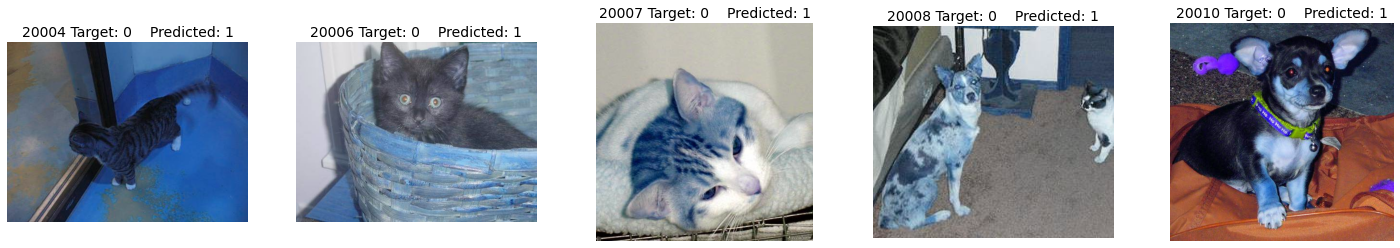

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 20000
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

print(misclassifiedIndexes)
print(len(misclassifiedIndexes))
print(len(categories))
print(len(predictions))

plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
img = cv2.imread('train/' + df['filename'][misclassifiedIndexes[0]], cv2.IMREAD_COLOR)
plt.imshow(img)

temp = 1
for index in misclassifiedIndexes:
  plt.subplot(1,5,temp)
  img = cv2.imread('train/' + df['filename'][index], cv2.IMREAD_COLOR)
  plt.axis('off')
  plt.title(f'{index} Target: {categories[y_test[index - 20000]]}    Predicted: {categories[predictions[index - 20000]]}', fontsize=14)
  plt.imshow(img)
  temp += 1
  if temp > 5:
    break

Misclassified image results are good and improves on every other models.

**Part 4**

Plot the training and validation accuracy per epoch for your (best) model from each part. Discuss any differences. Which model(s) tend to be overfit? Which model(s) are not? Why?

**Over all result:** <br/>
Part 1<br/>
first model with earlystop(patience=5)<br/>
accuracy: 0.7061 - val_loss: 0.5574 - val_accuracy: 0.7116<br/>
evaluation loss: 0.5446 -evaluation accuracy: 0.7208<br/> <br/>


2nd model with first model with earlystop(patience=5)<br/>
val_loss: 0.6862 - val_accuracy: 0.5644 and evaluation accuracy= 0.8270<br/>
evaluationloss: 0.6870 and evaluation accuracy: 0.5552<br/><br/>

Part 2 : using the augmented data<br/>
3rd model with first model with earlystop(patience=3) and 5 epoches<br/>
loss: 0.5382 - accuracy: 0.7347 - val_loss: 0.5010 - val_accuracy: 0.7580<br/>
 evaluation:<br/>
 loss: 0.4990 - accuracy: 0.7598<br/>

4th model with first model with earlystop(patience=3) and 5 epoches <br/>
loss: 0.6568 - accuracy: 0.7381 - val_loss: 0.6850 - val_accuracy: 0.5444<br/>
evaluation:<br/>
loss: 0.6806 - accuracy: 0.5462 <br/>

Part3<br/>

Xception<br/>
loss: 0.1373 - accuracy: 0.9486 - val_loss: 0.2159 - val_accuracy: 0.9060
<br/>
Evaluation:
loss: 0.2176 - accuracy: 0.9026
<br/>
ResNet<br/>
loss: 0.2104 - accuracy: 0.9159 - val_loss: 0.3690 - val_accuracy: 0.8554<br/>
loss: 0.3822 - accuracy: 0.8520<br/><br/>

For Efficient Net<br/>
loss: 0.0853 - accuracy: 0.9710 - val_loss: 0.6945 - val_accuracy: 0.5060<br/>
Evaluation:<br/>
loss: 0.6933 - accuracy: 0.5090<br/>



The overall best model is efficient Net from part 3 with the accuracy of 0.9710.
Here, the accuracy increased as we  moved on from the first model to last. However the2nd model on part 2 did not do well than model one. We might consider this as we are using just 5 epoches to avoid the runtime.

The best models were on the part 3 with the average accuracy of 89%.

The underfit model would be the wnd model in part 1 with less accuracy and high bios error. The Good fit model is the Xception from the part 3 and the overfit efficient Net from part 3

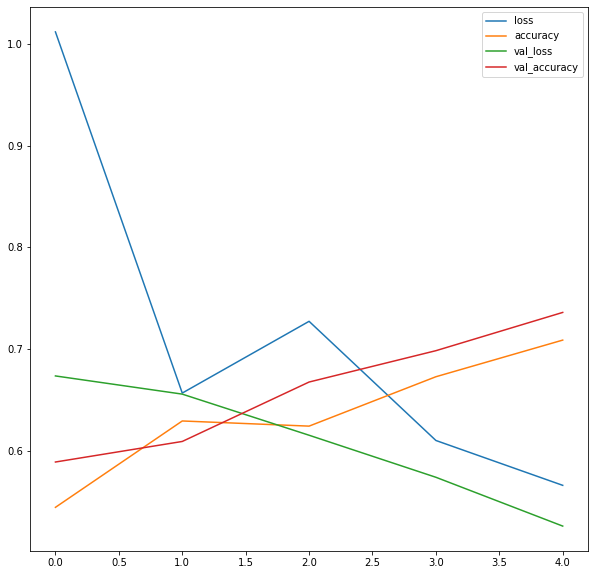

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))


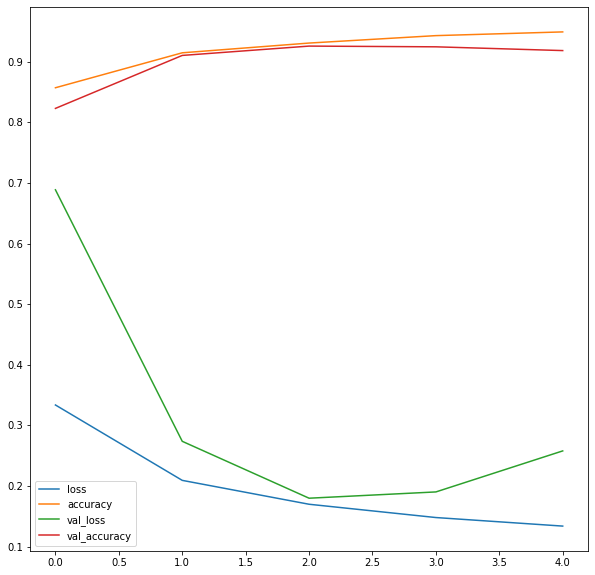

In [ ]:
pd.DataFrame(historyXception.history).plot(figsize=(10,10))


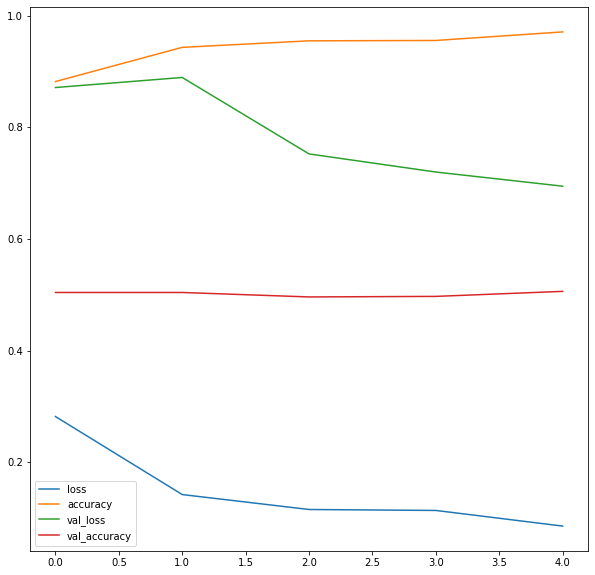

In [ ]:
pd.DataFrame(historyEfficient.history).plot(figsize=(10,10))
